# See if in (non)-linear relationship, X--> Z-->Y, X<--Z-->Y, X-->Z<--Y, negative relationship matters

In [3]:
import numpy as np


# ============================================
'''
X --> Z ---> Y or
X <-- Z ---> Y or
X --> Z <--- Y
'''
N = 10000
X = np.random.random(size = N)
# Y = np.random.random(size = N)
# Z = np.random.random(size = N)

noise1 = np.random.random(size=N)

noise2 = np.random.random(size=N)

print("X mean is", np.mean(X))
print("X std is ", np.std(X))



cXZ = 0.3
# Z = cXZ * X + cXZ * noise1
# Z = cXZ * np.log(np.abs(X)**2+1) + cXZ * noise1
# Z = cXZ * X**3 + np.sqrt(X) + cXZ * noise1
X = cXZ * (Z**2 + np.log(Z+3)**2 + (1+Z)/(2-Z**2)) + 5 * cXZ * noise1



cYZ = -0.5
# Y = cYZ * Z + cYZ * noise2
# Y = cYZ * Z**3 + cYZ * noise2
Y = cYZ * Z**2 + cYZ * np.log(np.abs(Z)) + cYZ * noise2
#Z = cXZ * (X**2 + np.log(X+3)**2 + (1+X)/(2-X**2)) + cYZ * Y**3 + (cXZ +cYZ)* noise1

print("===================== X --> Z --> Y=======================")
print("Correlation between X, Y is", np.corrcoef(X, Y)[0, 1])
print("Correlation between X, Z is", np.corrcoef(X, Z)[0, 1])
print("Correlation between Z, Y is", np.corrcoef(Y, Z)[0, 1])
print("Partial Correlation between X,Y|Z is", \
      (np.corrcoef(X,Y)[0, 1] - np.corrcoef(X,Z)[0, 1] * np.corrcoef(Y,Z)[0, 1])/ \
      (np.sqrt(1-np.corrcoef(X,Z)[0, 1]**2)*np.sqrt(1-np.corrcoef(Y,Z)[0, 1]**2)))

print("EX is ", np.mean(X))
print("EZ is ", np.mean(Z))
print("EXZ is", np.mean(X*Z))
print("SX is", np.var(X))
print("SZ is", np.var(Z))
print("SXZ is", np.var(X*Z))
print("pXZ is", (np.mean(X*Z) - np.mean(X)*np.mean(Z))/(np.var(X)*np.std(Z)))
print("Numrator: pXY = ", np.corrcoef(X, Y)[0, 1])
print("Numrator: pXZ = ", np.corrcoef(X, Z)[0, 1])
print("Numrator: pYZ = ", np.corrcoef(Y, Z)[0, 1])
print("Demominator: sqrt(1-pXZ^2) = ", np.sqrt(1-np.corrcoef(X, Z)[0, 1]**2))
print("Demominator: sqrt(1-pYZ^2) = ", np.sqrt(1-np.corrcoef(Y, Z)[0, 1]**2))



X mean is 0.5075818505749735
X std is  0.2876222927391753


NameError: name 'Z' is not defined

# See if in accidentally add other Z's, X and Y is still independent

In [5]:
import numpy as np
from numpy.linalg import inv


N = 10000

def stdiz(x):
    x = (x - np.mean(x))/np.std(x)
    return x

noise1 = np.random.random(size=N)
noise2 = np.random.random(size=N)
noise3 = np.random.random(size=N)
noise4 = np.random.random(size=N)
noise5 = np.random.random(size=N)
noise1 = stdiz(noise1)
noise2 = stdiz(noise2)
noise3 = stdiz(noise3)
noise4 = stdiz(noise4)
noise5 = stdiz(noise5)


#Z1 = np.random.random(size = N)
#Z1 = stdiz(Z1)
Z02 = np.random.random(size = N)
Z02 = stdiz(Z02)
#Z2 = np.random.random(size = N)
#Z2 = stdiz(Z2)
#Z3 = np.random.random(size = N)
#Z3 = stdiz(Z3)

X = 0.5* (Z02-1)**2 + 0.4 * noise1 # + 0.3 * (Z1**2 + np.log(np.abs(Z1)+3)**2)
#X = 0.5* Z02 + 0.4 * noise1
X = stdiz(X)
Z01 = 0.6 * np.log(np.abs(X)**2+1) + 0.9 * noise2
#Z01 = 0.6 * X + 0.9 * noise2
Z01 = stdiz(Z01)
Y = 0.7 * Z01**2 + 0.3 * np.log(np.abs(Z02))  + 0.5 * noise3 # + 0.3 * np.log(np.abs(Z2)+3)/(1+Z2)+ 0.8 * Z3**2
#Y = 0.7 * Z01 + 0.3 * Z02  + 0.5 * noise3 # + 0.3 * np.log(np.abs(Z2)+3)/(1+Z2)+ 0.8 * Z3**2

Y = stdiz(Y)
# Z4 = 0.6 * (2*X**3 -X**2 + 3*X +1) + noise4
#Z4 = stdiz(Z4)
#Z5 = 0.2 * Y **2 + noise5
#Z5 = stdiz(Z5)


# data = np.c_[X,Y,Z01,Z02,Z1,Z2,Z3,Z4,Z5]
data = np.c_[X,Y,Z01,Z02]

corr_matrix = np.corrcoef(data.T)
print(corr_matrix.shape)

print("Correlation between X, Y is", corr_matrix[0, 1])
tmp1 = corr_matrix[:2, :2] - np.matmul(np.matmul(corr_matrix[[[0],[1]], [[2],[2]]], inv(corr_matrix[[[2]],[[2]]])), np.transpose(corr_matrix[[[0],[1]], [[2],[2]]]))
print("Partial Correlation between X,Y|Z01 is", tmp1[0,1]/np.sqrt(tmp1[0,0]*tmp1[1,1]))

tmp2 = corr_matrix[:2, :2] - np.matmul(np.matmul(corr_matrix[[[0],[1]], [[3],[3]]], inv(corr_matrix[[[3]],[[3]]])),np.transpose(corr_matrix[[[0],[1]], [[3],[3]]]))
print("Partial Correlation between X,Y|Z02 is", tmp2[0,1]/np.sqrt(tmp2[0,0]*tmp2[1,1]))

tmp3 = corr_matrix[:2, :2] - np.matmul(np.matmul(corr_matrix[[[0,0],[1,1]], [[2,3],[2,3]]], inv(corr_matrix[[[2,2],[3,3]],[[2,3],[2,3]]])),np.transpose(corr_matrix[[[0,0],[1,1]], [[2,3],[2,3]]]))
print("Partial Correlation between X,Y|Z01,Z02 is", tmp3[0,1]/np.sqrt(tmp3[0,0]*tmp3[1,1]))

pXY_Z01 = (np.corrcoef(X,Y)[0, 1] - np.corrcoef(X,Z01)[0, 1] * np.corrcoef(Y,Z01)[0, 1])/ \
      (np.sqrt(1-np.corrcoef(X,Z01)[0, 1]**2)*np.sqrt(1-np.corrcoef(Y,Z01)[0, 1]**2))
print("pXY|Z01 is:", pXY_Z01)

pXZ02_Z01 = (np.corrcoef(X,Z02)[0, 1] - np.corrcoef(X,Z01)[0, 1] * np.corrcoef(Z02,Z01)[0, 1])/ \
      (np.sqrt(1-np.corrcoef(X,Z01)[0, 1]**2)*np.sqrt(1-np.corrcoef(Z02,Z01)[0, 1]**2))
print("pXZ02|Z01 is:", pXZ02_Z01)

pYZ02_Z01 = (np.corrcoef(Y,Z02)[0, 1] - np.corrcoef(Y,Z01)[0, 1] * np.corrcoef(Z02,Z01)[0, 1])/ \
      (np.sqrt(1-np.corrcoef(Y,Z01)[0, 1]**2)*np.sqrt(1-np.corrcoef(Z02,Z01)[0, 1]**2))
print("pYZ02|Z01 is:", pYZ02_Z01)

pXY_Z01Z02 = (pXY_Z01 - pXZ02_Z01 * pYZ02_Z01 )/ np.sqrt(1-pXZ02_Z01**2)/ np.sqrt(1-pYZ02_Z01**2)
print("pXY|Z01,Z02 is:", pXY_Z01Z02)


(4, 4)
Correlation between X, Y is 0.17720574738460795
Partial Correlation between X,Y|Z01 is 0.17020176719710303
Partial Correlation between X,Y|Z02 is 0.24754351701300753
Partial Correlation between X,Y|Z01,Z02 is 0.2430955582531655
pXY|Z01 is: 0.17020176719710303
pXZ02|Z01 is: -0.858002484190064
pYZ02|Z01 is: -0.05304484905681698
pXY|Z01,Z02 is: 0.2430955582531656


Conclusion: PC works for only linesr relationships

In [6]:
np.save('corr_matrix_4_N=10000.npy',corr_matrix)

In [7]:
M0 = np.array(corr_matrix[:2,:2])
M1 = np.array([[corr_matrix[0, 2]],[corr_matrix[1, 2]]])
M2 = np.array([[corr_matrix[2, 2]]])
print(M2.shape)
H = M0 - np.matmul(np.matmul(M1, inv(M2)), np.transpose(M1))
print(H)
print(H[0,1]/(H[0,0]*H[1,1]))
    

(1, 1)
[[0.97789832 0.16798644]
 [0.16798644 0.99615434]]
0.17244630756062415


In [8]:
np.array(corr_matrix[:2,:2])

array([[1.        , 0.17720575],
       [0.17720575, 1.        ]])

In [9]:
corr_matrix

array([[ 1.        ,  0.17720575,  0.14866633, -0.8594088 ],
       [ 0.17720575,  1.        ,  0.06201341, -0.05918172],
       [ 0.14866633,  0.06201341,  1.        , -0.1053584 ],
       [-0.8594088 , -0.05918172, -0.1053584 ,  1.        ]])

In [10]:
inv(corr_matrix[[[2]],[[2]]])

array([[1.]])

# See if in linear/nonlinear relationship, X <-- Z-->Y, negative relationship matters

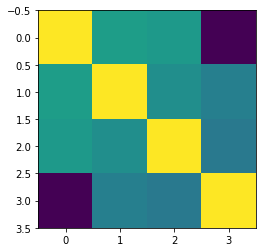

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(corr_matrix) #, cmap='gray')


In [122]:
corr_matrix

array([[ 1.        ,  0.15816799,  0.15431817, -0.85877318],
       [ 0.15816799,  1.        ,  0.0684043 , -0.04940422],
       [ 0.15431817,  0.0684043 ,  1.        , -0.11394644],
       [-0.85877318, -0.04940422, -0.11394644,  1.        ]])

In [105]:
a = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10],[4,7,3,6]])
a[[[0],[1]], [[2],[2]]]

array([[3],
       [6]])

In [103]:
b = np.array[] 

array([[3, 4],
       [6, 7]])